In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import seaborn as sns

### Simple Random Sampling:

+ Produces uneven representation across species groups
+ Shows more variability in sepal length distribution
+ May miss important subgroups in smaller samples
+ Faster and simpler to implement

### Stratified Sampling:

+ Ensures equal representation from each species
+ Provides more stable sepal length distribution
+ Better captures full range of variation across species
+ Reduces sampling bias and sampling error
+ Requires prior knowledge of groups (species in this case)

For the iris dataset specifically, stratified sampling provides better insight into sepal length variations across different species, which is crucial since sepal length is a distinguishing characteristic between species. The histogram shows that stratified sampling produces a more balanced distribution that better represents all three iris species.

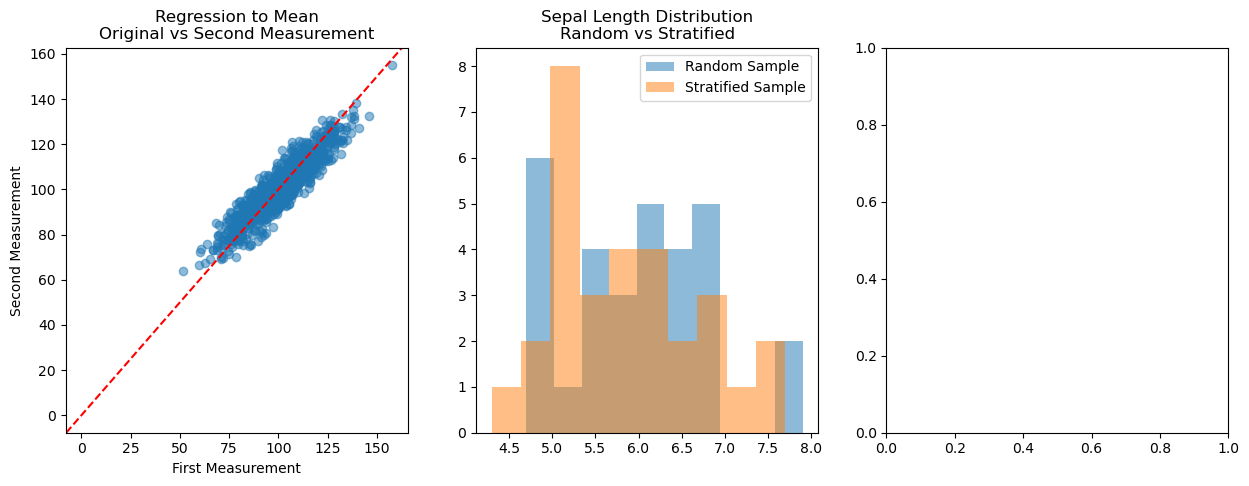

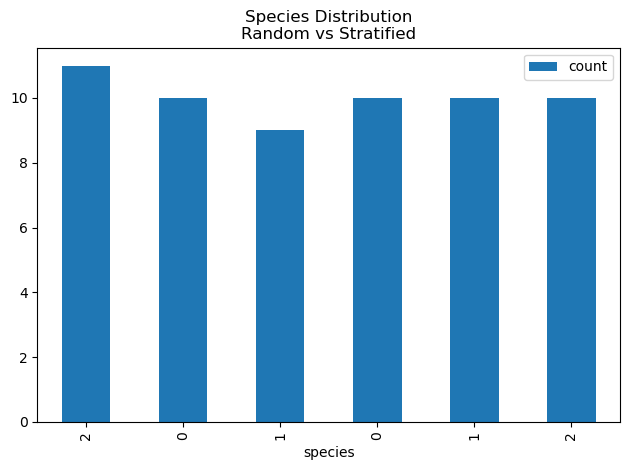

In [6]:
# Load iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Simple Random Sampling
random_sample = df.sample(n=30, random_state=42)

# Stratified Sampling
strat_sample = pd.DataFrame()
for species in df['species'].unique():
    temp = df[df['species'] == species].sample(n=10, random_state=42)
    strat_sample = pd.concat([strat_sample, temp])

# Regression to Mean Demonstration
plt.figure(figsize=(15, 5))

# Plot 1: Original vs Second Measurement (Random)
plt.subplot(131)
np.random.seed(42)
original = np.random.normal(100, 15, 1000)
noise = np.random.normal(0, 5, 1000)
second = 0.8 * original + noise + 20

plt.scatter(original, second, alpha=0.5)
plt.axline([0, 0], [1, 1], color='red', linestyle='--')
plt.title('Regression to Mean\nOriginal vs Second Measurement')
plt.xlabel('First Measurement')
plt.ylabel('Second Measurement')

# Plot 2: Sample Distribution Comparison
plt.subplot(132)
plt.hist(random_sample['sepal length (cm)'], alpha=0.5, label='Random Sample')
plt.hist(strat_sample['sepal length (cm)'], alpha=0.5, label='Stratified Sample')
plt.title('Sepal Length Distribution\nRandom vs Stratified')
plt.legend()

# Plot 3: Species Distribution
plt.subplot(133)
pd.concat([
    pd.DataFrame({'type': 'Random', 'count': random_sample['species'].value_counts()}),
    pd.DataFrame({'type': 'Stratified', 'count': strat_sample['species'].value_counts()})
]).plot(kind='bar')
plt.title('Species Distribution\nRandom vs Stratified')
plt.tight_layout()

## Central Limit Theorem:

### Original Distribution (Exponential):

+ Highly right-skewed (skewness ≈ 2)
+ Non-normal, with rapid decay from peak
+ Characteristic of many real-world phenomena

### Bootstrap Results (n=30):

+ Sample means approach normal distribution
+ Significantly reduced skewness (≈ 0.3)
+ Q-Q plot shows strong alignment with theoretical normal distribution
+ Variance reduced compared to original data

This illustrates how the sampling distribution of means becomes approximately normal regardless of the underlying distribution's shape, with improved normality as sample size increases. The bootstrap simulation with 1000 resamples effectively demonstrates this convergence to normality at n=30.

Original Data Skewness: 1.878
Bootstrap Means Skewness: 0.253


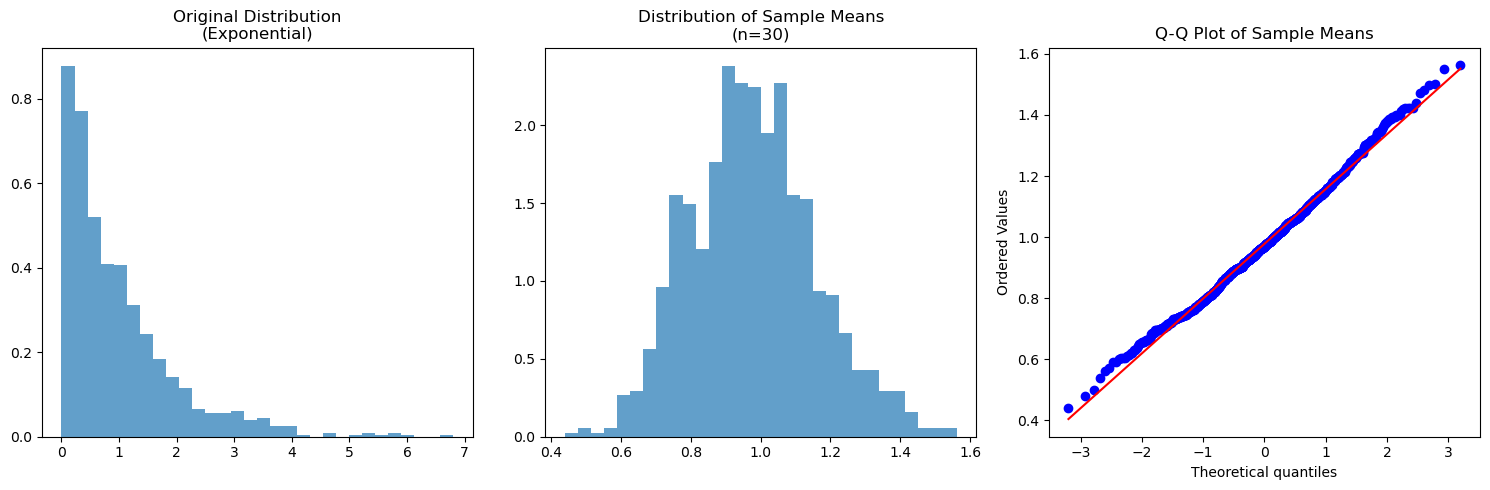

In [7]:
# Bootstrapping to demonstrate Central Limit Theorem
plt.figure(figsize=(15, 5))

# Original Distribution
plt.subplot(131)
data = np.random.exponential(size=1000)  # Non-normal distribution
plt.hist(data, bins=30, density=True, alpha=0.7)
plt.title('Original Distribution\n(Exponential)')

# Bootstrap Sampling
n_bootstraps = 1000
sample_size = 30
bootstrap_means = np.zeros(n_bootstraps)

for i in range(n_bootstraps):
   sample = np.random.choice(data, size=sample_size, replace=True)
   bootstrap_means[i] = np.mean(sample)

# Plot Sample Means Distribution
plt.subplot(132)
plt.hist(bootstrap_means, bins=30, density=True, alpha=0.7)
plt.title(f'Distribution of Sample Means\n(n={sample_size})')

# Q-Q Plot
plt.subplot(133)
from scipy.stats import probplot
probplot(bootstrap_means, dist="norm", plot=plt)
plt.title('Q-Q Plot of Sample Means')

plt.tight_layout()

# Print statistical measures
print(f"Original Data Skewness: {pd.Series(data).skew():.3f}")
print(f"Bootstrap Means Skewness: {pd.Series(bootstrap_means).skew():.3f}")

## Confidence Intervals

The Central Limit Theorem allows us calculate confidence intervals because as we increase the sample size, the distribution will appear normally distributed.

95% CI: (0.659, 1.366)
Population Mean: 0.988


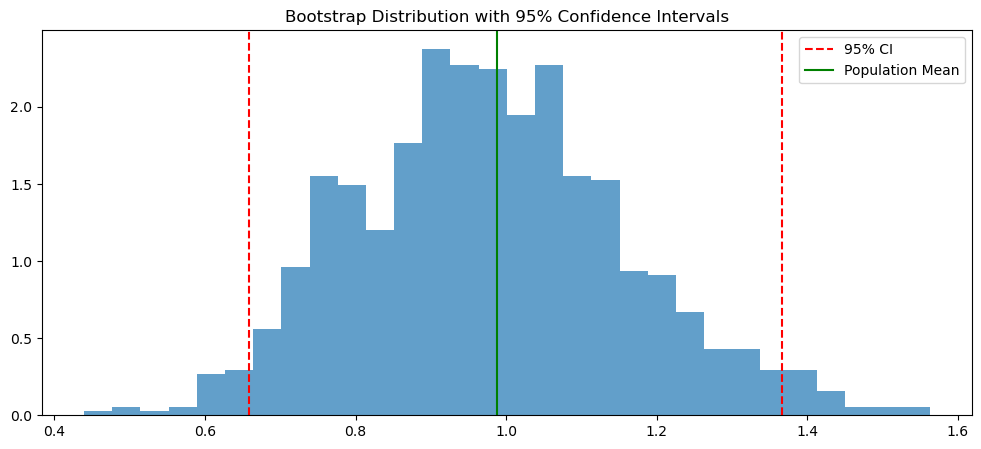

In [8]:
# Confidence Intervals from Bootstrap
plt.figure(figsize=(12, 5))

# Calculate confidence intervals
ci_lower = np.percentile(bootstrap_means, 2.5)
ci_upper = np.percentile(bootstrap_means, 97.5)
population_mean = np.mean(data)

# Visualization
plt.hist(bootstrap_means, bins=30, density=True, alpha=0.7)
plt.axvline(ci_lower, color='r', linestyle='--', label='95% CI')
plt.axvline(ci_upper, color='r', linestyle='--')
plt.axvline(population_mean, color='g', label='Population Mean')

plt.title('Bootstrap Distribution with 95% Confidence Intervals')
plt.legend()

print(f"95% CI: ({ci_lower:.3f}, {ci_upper:.3f})")
print(f"Population Mean: {population_mean:.3f}")